<a href="https://colab.research.google.com/github/bigirimanainnocent12/Machine-Learning-avec-GOOGLE-COLAB_R-gression_Lineaire/blob/main/prix_de_l'immobilier_en_fonction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Description des variables de l'étude
---

Le marché immobilier est un domaine d'une importance capitale, influencé par de multiples facteurs économiques, sociaux et environnementaux. Dans le cadre de cette étude, nous nous intéressons à la prédiction du prix des maisons dans les quartiers de Boston, un exercice essentiel pour divers acteurs du secteur immobilier, tels que les promoteurs, les investisseurs et les décideurs politiques. Utiliser des modèles prédictifs pour estimer la valeur des maisons peut fournir des informations précieuses pour mieux comprendre les dynamiques du marché et anticiper les fluctuations des prix.

Nous basons notre analyse sur des variables socio-économiques et démographiques spécifiques qui influencent directement ou indirectement les prix de l'immobilier. Parmi les variables considérées, nous retrouvons :

- MEDV : Valeur médiane des maisons occupées par leurs propriétaires, exprimée en milliers de dollars, qui représente la variable cible à prédire.

- PTRATIO : Ratio élèves/enseignants par commune, un indicateur clé de la qualité des infrastructures éducatives d'un quartier.

- RM : Nombre moyen de pièces par logement, reflétant la taille et le confort des habitations, des éléments essentiels pour les acheteurs potentiels.

- LSTAT : Pourcentage de la population à faible statut socio-économique, qui peut influer sur la demande et la valorisation des propriétés dans un quartier.

En combinant ces caractéristiques, cette étude vise à développer un modèle de régression performant pour prédire les prix immobiliers dans les différents quartiers de Boston. Une telle analyse peut également révéler les facteurs qui jouent un rôle crucial dans la formation des prix, permettant ainsi d'informer les stratégies de développement urbain et les politiques d'investissement.


[Lien pour la base de données](https://www.kaggle.com/datasets/schirmerchad/bostonhoustingmlnd)

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('housing.csv')
df

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
...,...,...,...,...
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0


In [14]:
df[df.isnull().any(axis=1)]

,RM,LSTAT,PTRATIO,MEDV


In [15]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


# ***Visualiser les corrélations entre les variables***

Text(0.5, 1.0, 'Nuage des points entre PTRATIO et MEDV')

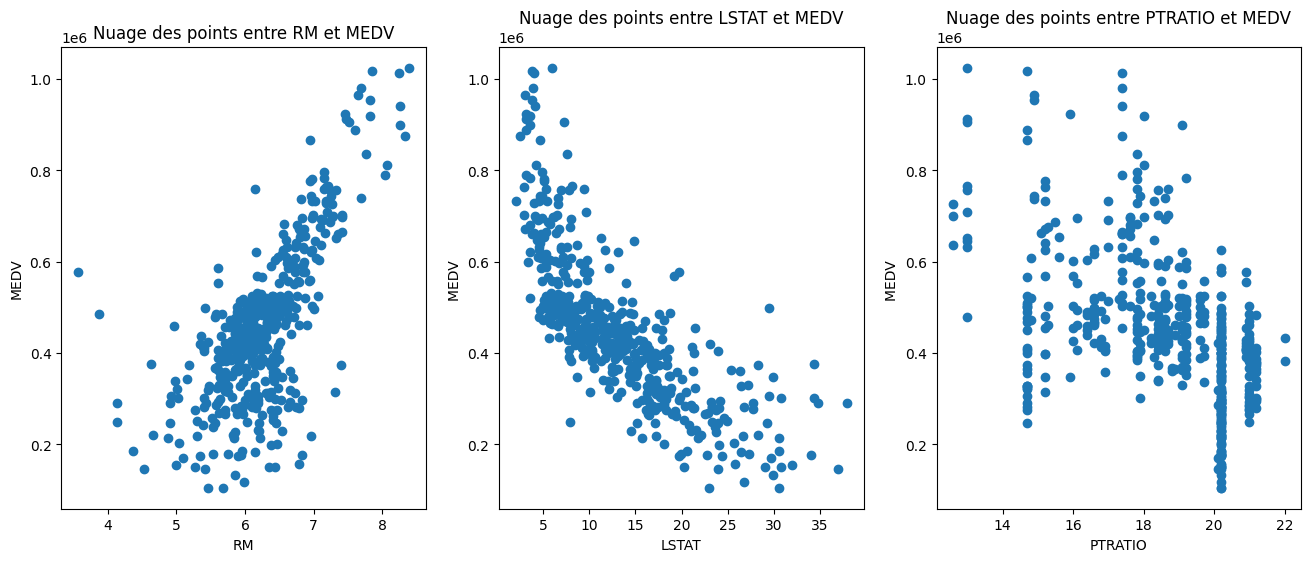

In [16]:
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['RM'],df['MEDV'],'o')
axes[0].set_ylabel('MEDV')
axes[0].set_xlabel('RM')
axes[0].set_title('Nuage des points entre RM et MEDV')

axes[1].plot(df['LSTAT'],df['MEDV'],'o')
axes[1].set_ylabel('MEDV ')
axes[1].set_xlabel('LSTAT')
axes[1].set_title('Nuage des points entre LSTAT et MEDV')

axes[2].plot(df['PTRATIO'],df['MEDV'],'o')
axes[2].set_ylabel('MEDV ')
axes[2].set_xlabel('PTRATIO')
axes[2].set_title('Nuage des points entre PTRATIO et MEDV')

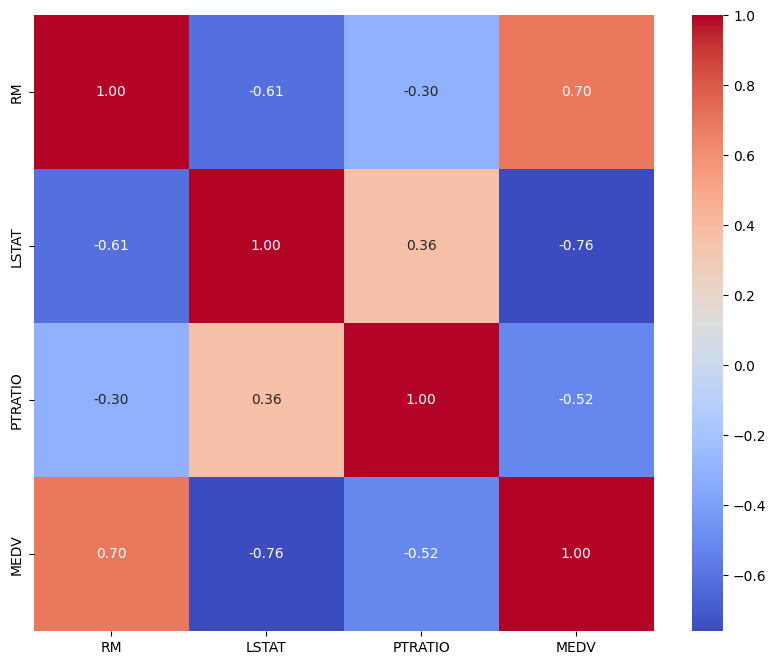

In [17]:
# Visualiser les corrélations entre les variables
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

# ***Modèle de machine learning: Régression linéaire multiple***

**Séparation de données entre deux ensembles:
- Un ensemble pour l'entraînement
- Un ensemble pour le test

In [ ]:
from sklearn.model_selection import train_test_split

X=df.drop('MEDV',axis=1)
y=df['MEDV']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

# Entrainement du modèle

In [ ]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

# Prédiction

In [ ]:
predictions=model.predict(X_test)

# Evaluation des performances du modèle

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error

mse=mean_squared_error(y_test,predictions)
print(f'Erreur quadratique moyenne: {mse}')

r2=r2_score(y_test,predictions)
print(f'Coefficient de détermination: {round(r2*100,2)}')

mea=mean_absolute_error(y_test,predictions)
print(f'Erreur absolue moyenne: {mea}')

Erreur quadratique moyenne: 7048219280.21769
Coefficient de détermination: 69.1
Erreur absolue moyenne: 63313.49737234147


# Evaluations des résidus

In [ ]:
residus=y_test-predictions

Text(0, 0.5, 'Fréquence')

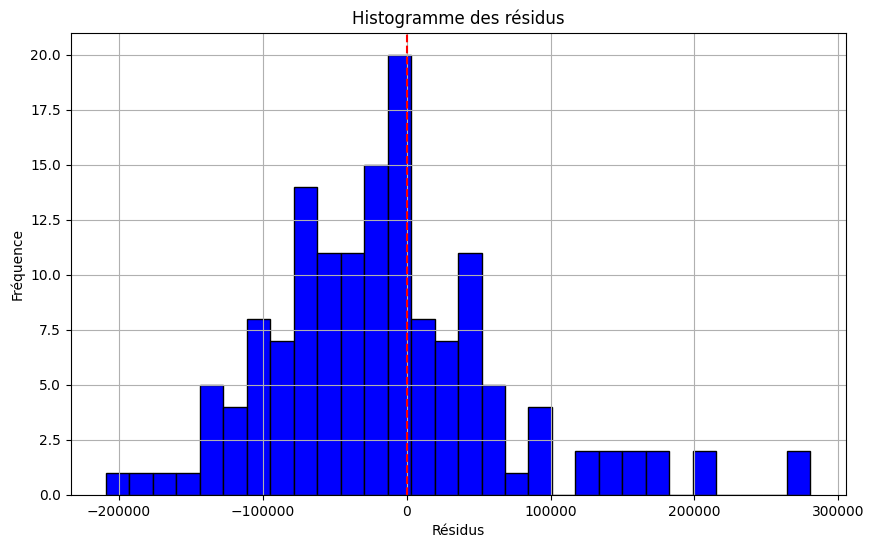

In [ ]:
residus.hist(bins=30,figsize=(10,6),edgecolor='black',color='blue')
plt.axvline(x=0,color='red',linestyle='--')
plt.title('Histogramme des résidus')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')

<ipython-input-49-1ab5822bd860>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residus)


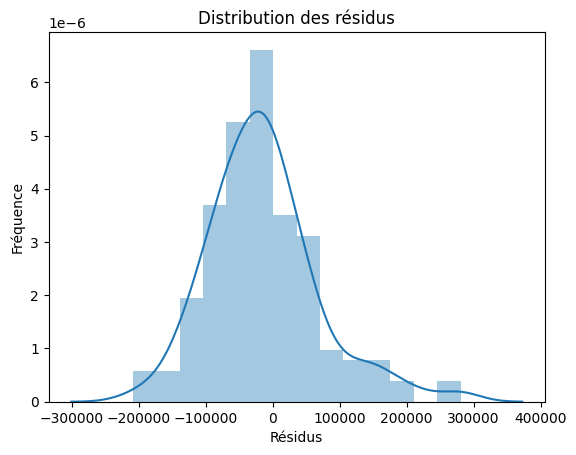

In [ ]:
sns.distplot(residus)
plt.title('Distribution des résidus')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.show()


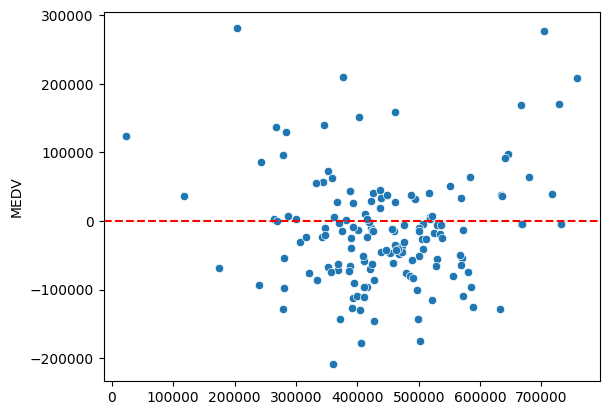

In [ ]:
sns.scatterplot(x=predictions,y=residus)
plt.axhline(y=0,color='r',linestyle='--')

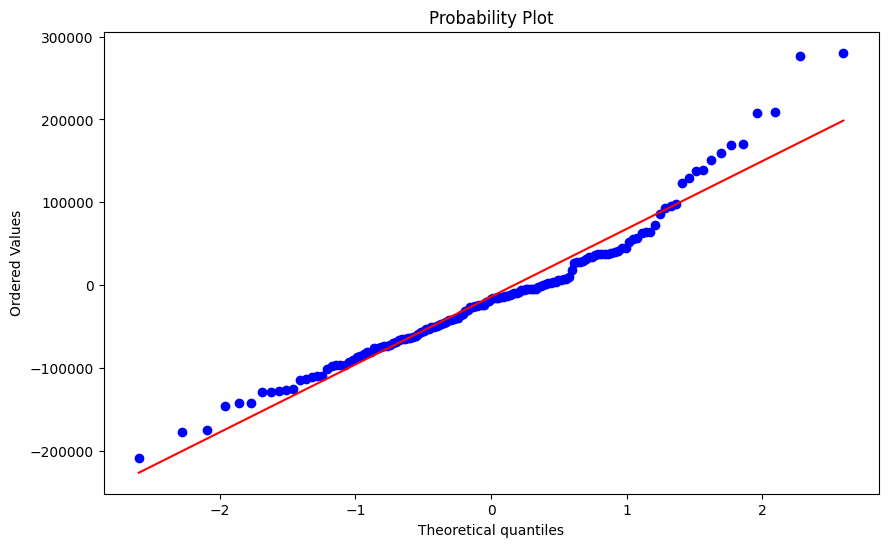

In [ ]:
import scipy as sp
fig, axes=plt.subplots(figsize=(  10,6),dpi=100)
_=sp.stats.probplot(residus,plot=axes)

In [ ]:
from scipy import stats
stats.shapiro(residus)

ShapiroResult(statistic=0.9518892456273282, pvalue=5.6355943687056394e-05)

# **Déploiement des modèles**


In [ ]:
!pip install SALib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.9/778.9 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.1 MB/s eta 0:00:00


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from SALib.sample import saltelli
from SALib.analyze import sobol
from sklearn.datasets import make_regression

In [ ]:
problem = {
    'num_vars': X.shape[1],  # nombre de variables d'entrée
    'names': ['RM', 'LSTAT', 'PTRATIO'],  # noms des variables
    'bounds': [[X.iloc[:,i].min(), X.iloc[:,i].max()] for i in range(X.shape[1])]  # bornes des variables
}

In [ ]:
# 5. Générer des échantillons pour les entrées avec la méthode de Saltelli
param_values = saltelli.sample(problem, 1000)

<ipython-input-63-cfb2599c0ccc>:2: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5.1 Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 1000)
/usr/local/lib/python3.10/dist-packages/SALib/sample/saltelli.py:110: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (1000) is equal to `2^n`.
        
  warnings.warn(msg)


In [ ]:
# 6. Faire des prédictions pour ces échantillons en utilisant le modèle
Y = model.predict(param_values)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# 7. Calculer les indices de Sobol
Si = sobol.analyze(problem, Y, print_to_console=True)

/usr/local/lib/python3.10/dist-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


               ST   ST_conf
RM       0.538544  0.040873
LSTAT    0.371082  0.031732
PTRATIO  0.088992  0.008124
               S1   S1_conf
RM       0.542427  0.060467
LSTAT    0.374002  0.048379
PTRATIO  0.088719  0.026973
                        S2   S2_conf
(RM, LSTAT)      -0.007786  0.098358
(RM, PTRATIO)    -0.004305  0.075810
(LSTAT, PTRATIO) -0.002380  0.064142


In [ ]:
# 8. Récupérer les indices de premier ordre et totaux
S1 = Si['S1']  # Indices de Sobol de premier ordre
ST = Si['ST']  # Indices de Sobol totaux

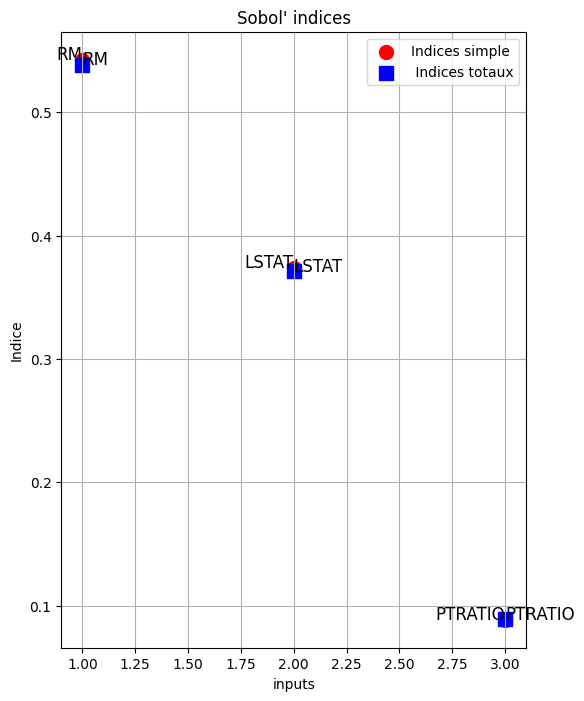

In [ ]:
# 9. Visualiser les indices de Sobol avec des points similaires à la figure
x = np.arange(1, len(S1) + 1)  # L'axe des x représente les variables d'entrée

# Créer la figure et les axes
plt.figure(figsize=(6, 8))

# Points pour les indices de premier ordre (S1)
plt.scatter(x, S1, color='red', label='Indices simple', s=100)  # Points rouges

# Points pour les indices totaux (ST)
plt.scatter(x, ST, color='blue', label=' Indices totaux', marker='s', s=100)  # Carrés bleus
# Ajouter des labels et le titre
plt.xlabel('inputs')
plt.ylabel('Indice')
plt.title("Sobol' indices")

# Afficher les légendes
plt.legend()

# Afficher les noms des points
for i in range(len(S1)):
    plt.text(x[i], S1[i], problem['names'][i], fontsize=12, ha='right', color='black')
    plt.text(x[i], ST[i], problem['names'][i], fontsize=12, ha='left', color='black')

# Afficher la grille et le graphique
plt.grid(True)
plt.show()